# COVID-19 Iran Confirmed Cases and Fatalities Forecasting

**In this notebook, the model will be predicting the cumulative number of confirmed COVID19 cases in Iran, as well as the number of resulting fatalities, for future dates. We understand this is a serious situation, and in no way want to trivialize the human impact this crisis is causing by predicting fatalities. Our goal is to provide better methods for estimates that can assist medical and governmental institutions to prepare and adjust as pandemics unfold. In this particular notebook popular facebook prophet algorithm used.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv


Loading Total Data

In [3]:
train=pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

Seperate Iran Data

In [4]:
country=train[(train['Country/Region']=='Iran')]
country=country.groupby(country.ObservationDate).sum()
country['ObservationDate']=country.index

In [5]:
country.tail()

,SNo,Confirmed,Deaths,Recovered,ObservationDate
ObservationDate,,,,,
04/18/2020,16166,80868.0,5031.0,55987.0,04/18/2020
04/19/2020,16486,82211.0,5118.0,57023.0,04/19/2020
04/20/2020,16806,83505.0,5209.0,59273.0,04/20/2020
04/21/2020,17126,84802.0,5297.0,60965.0,04/21/2020
04/22/2020,17446,85996.0,5391.0,63113.0,04/22/2020


Confirmed Cases Forecasting

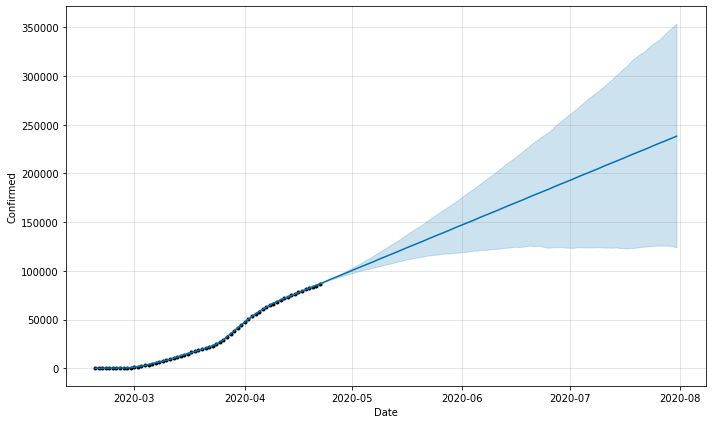

In [6]:
country_cc=country[['ObservationDate','Confirmed']]
country_cc['ds']=country_cc['ObservationDate']
country_cc['y']=country_cc['Confirmed']
country_cc.drop(columns=['ObservationDate','Confirmed'], inplace=True)
country_cc.head()

from fbprophet import Prophet
model_cc=Prophet()
model_cc.fit(country_cc)

future = model_cc.make_future_dataframe(periods=100)

forecast=model_cc.predict(future)

fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Confirmed")

Deaths Forecasting

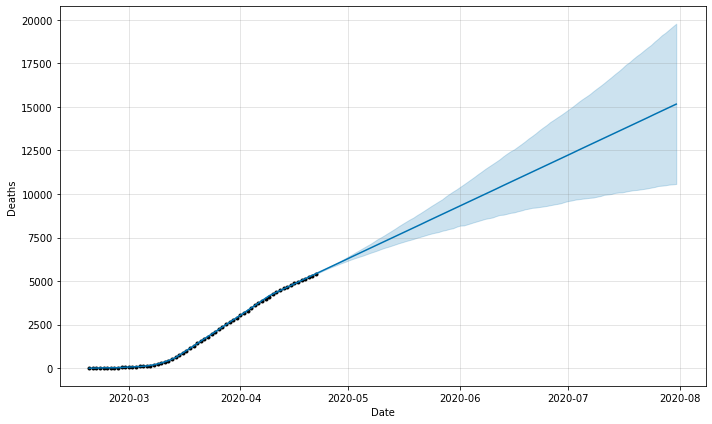

In [7]:
country_cc=country[['ObservationDate','Deaths']]
country_cc['ds']=country_cc['ObservationDate']
country_cc['y']=country_cc['Deaths']
country_cc.drop(columns=['ObservationDate','Deaths'], inplace=True)
country_cc.head()

model_cc=Prophet()
model_cc.fit(country_cc)

future = model_cc.make_future_dataframe(periods=100)

forecast=model_cc.predict(future)

fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Deaths")

**#StayHome #StaySafe #May Almighty bless us All**